In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv(r'/Users/krishnavamsi/Downloads/Intrusion detection 2/New Dataset/KDDTrain.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [3]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  int64  
 5   dst_bytes                    125973 non-null  int64  
 6   land                         125973 non-null  int64  
 7   wrong_fragment               125973 non-null  int64  
 8   urgent                       125973 non-null  int64  
 9   hot                          125973 non-null  int64  
 10  num_failed_logins            125973 non-null  int64  
 11  logged_in                    125973 non-null  int64  
 12  num_compromised              125973 non-null  int64  
 13 

In [5]:
df.drop(['protocol_type', 'service', 'flag'], axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 39 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  int64  
 1   src_bytes                    125973 non-null  int64  
 2   dst_bytes                    125973 non-null  int64  
 3   land                         125973 non-null  int64  
 4   wrong_fragment               125973 non-null  int64  
 5   urgent                       125973 non-null  int64  
 6   hot                          125973 non-null  int64  
 7   num_failed_logins            125973 non-null  int64  
 8   logged_in                    125973 non-null  int64  
 9   num_compromised              125973 non-null  int64  
 10  root_shell                   125973 non-null  int64  
 11  su_attempted                 125973 non-null  int64  
 12  num_root                     125973 non-null  int64  
 13 

In [6]:
df.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,491,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,146,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,dos
3,0,232,8153,0,0,0,0,0,1,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,199,420,0,0,0,0,0,1,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


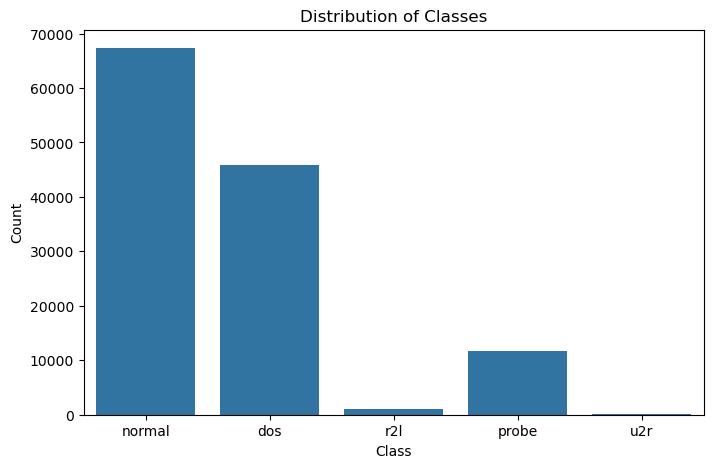

In [7]:
# Check the distribution of the target variable 'label'
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [8]:
df['label'].unique()

array(['normal', 'dos', 'r2l', 'probe', 'u2r'], dtype=object)

In [9]:
df['label'].value_counts()

label
normal    67343
dos       45927
probe     11656
r2l         995
u2r          52
Name: count, dtype: int64

In [10]:
# Basic preprocessing
df['label'] = df['label'].map({'normal': 0, 'dos': 1, 'r2l': 2, 'probe': 3, 'u2r': 4})

In [11]:
# Count the number of samples in each class
class_counts = df['label'].value_counts()

In [12]:
# Create an empty DataFrame for the balanced dataset
balanced_df = pd.DataFrame()

In [13]:
# Target number of samples for each class
target_count = 5000

In [16]:
for label in class_counts.index:
    # If the class has fewer samples, we will upsample it
    if class_counts[label] < target_count:
        # Upsample the minority class
        sampled_df = df[df['label'] == label].sample(target_count, replace=True)
    else:
        # Downsample the majority class
        sampled_df = df[df['label'] == label].sample(target_count, replace=False)
    
    # Append the sampled DataFrame to the balanced DataFrame
    balanced_df = pd.concat([balanced_df, sampled_df], ignore_index=True)

In [17]:
# Check the class distribution in the balanced DataFrame
print(balanced_df['label'].value_counts())

label
0    5000
1    5000
3    5000
2    5000
4    5000
Name: count, dtype: int64


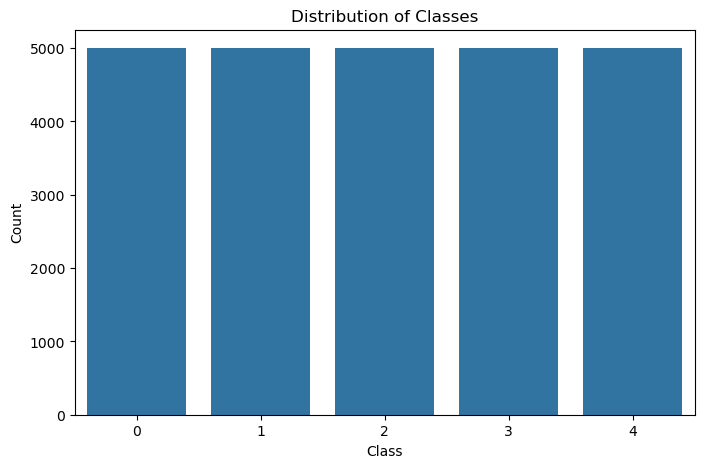

In [18]:
# Check the distribution of the target variable 'label'
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=balanced_df)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [20]:
def build_discriminator(input_dim, base_neurons, num_layers, learning_rate, activation):
    model = Sequential(name='Discriminator')
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(base_neurons * num_layers, activation=activation))
    
    for layer in range(num_layers - 1):
        model.add(Dense(base_neurons * (num_layers - layer - 1), activation=activation))
        
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return model

def build_generator(output_dim, base_neurons, noise_dim, num_layers, learning_rate, activation):
    model = Sequential(name='Generator')
    model.add(Input(shape=(noise_dim,)))
    model.add(Dense(base_neurons, activation=activation))
    
    for layer in range(num_layers - 1):
        model.add(Dense(base_neurons * (layer + 2), activation=activation))
        
    model.add(Dense(output_dim, activation='tanh'))  # Use 'tanh' for output
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer)
    
    return model

def assemble_gan(generator, discriminator, noise_dim):
    discriminator.trainable = False
    gan_input = Input(shape=(noise_dim,))
    gan_output = discriminator(generator(gan_input))
    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer='adam')
    return gan

def generate_batch(data, batch_size=1):
    indices = np.random.choice(len(data), batch_size, replace=False)
    return data[indices]

def train_gan(params, training_data):
    K.clear_session()  # Clear previous session
    
    noise_dim, num_steps, batch_size, d_epochs, g_epochs, base_neurons, learning_rate, num_layers, optimizer_name, activation = params
    input_dim = training_data.shape[1]
    
    # Initialize models
    generator = build_generator(input_dim, base_neurons, noise_dim, num_layers, learning_rate, activation)
    discriminator = build_discriminator(input_dim, base_neurons, num_layers, learning_rate, activation)
    gan_model = assemble_gan(generator, discriminator, noise_dim)
    
    for epoch in range(num_steps):
        # Train the discriminator
        for _ in range(d_epochs):
            noise = np.random.normal(0, 1, (batch_size, noise_dim))
            generated_samples = generator.predict(noise)
            real_samples = generate_batch(training_data, batch_size)

            d_loss_real_val = discriminator.train_on_batch(real_samples, np.random.uniform(0.8, 1.0, size=batch_size))
            d_loss_fake_val = discriminator.train_on_batch(generated_samples, np.random.uniform(0.0, 0.2, size=batch_size))

        # Train the generator
        for _ in range(g_epochs):
            noise = np.random.normal(0, 1, (batch_size, noise_dim))
            g_loss_val = gan_model.train_on_batch(noise, np.random.uniform(0.8, 1.0, size=batch_size))
        
        # Extract the first element from g_loss_val if it's a list
        g_loss_val = g_loss_val[0] if isinstance(g_loss_val, list) else g_loss_val
        
        if epoch % 10 == 0:
            print(f'Epoch: {epoch}, D Loss Real: {d_loss_real_val:.4f}, D Loss Fake: {d_loss_fake_val:.4f}, G Loss: {g_loss_val:.4f}')
    
    return {
        "generator": generator,
        "discriminator": discriminator,
        "gan": gan_model
    }

In [21]:
# For example, you can convert it to a NumPy array:
X = balanced_df.drop('label', axis=1).values

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define your parameters
noise_dimension = 32
num_steps = 500  # Adjust based on your needs
batch_size = 128
d_epochs = 1
g_epochs = 1
base_neurons = 50
learning_rate = 0.0002
num_layers = 4
optimizer_name = 'adam'
activation_function = 'relu'

# Pack the parameters into a list
params = [noise_dimension, num_steps, batch_size, d_epochs, g_epochs, base_neurons, learning_rate, num_layers, optimizer_name, activation_function]

In [22]:
# Train the GAN
results = train_gan(params, X_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Epoch: 0, D Loss Real: 0.6155, D Loss Fake: 0.6552, G Loss: 0.6910
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch: 10, D Loss Real: 0.6944, D Loss Fake: 0.7064, G Loss: 0.6088
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Epoch: 20, D Loss Real: 0.7825, D Loss Fake: 0.7939, G Loss: 0.5219
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
4/4 ━━━━━━━━━━━━━━━━

In [26]:
# Features and labels
X = balanced_df.drop('label', axis=1).values
y = balanced_df['label'].values

In [27]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
# Split the data into training and test sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
# Define the hyperparameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [31]:
# Define the hyperparameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [32]:
# Initialize the models
rf_model = RandomForestClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

In [33]:
# Set up the GridSearchCV for Random Forest
rf_grid_search = GridSearchCV(estimator=rf_model,
                               param_grid=rf_param_grid,
                               scoring='accuracy',
                               cv=3,  # 3-fold cross-validation
                               n_jobs=-1,  # Use all available cores
                               verbose=2)  # Print progress

In [34]:
# Set up the GridSearchCV for Decision Tree
dt_grid_search = GridSearchCV(estimator=dt_model,
                               param_grid=dt_param_grid,
                               scoring='accuracy',
                               cv=3,  # 3-fold cross-validation
                               n_jobs=-1,  # Use all available cores
                               verbose=2)  # Print progress

In [35]:
# Fit the models
print("Tuning Random Forest...")
rf_grid_search.fit(x_train, y_train)

Tuning Random Forest...
Fitting 3 folds for each of 216 candidates, totalling 648 fits


/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [37]:
print("Tuning Decision Tree...")
dt_grid_search.fit(x_train, y_train)

Tuning Decision Tree...
Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=2)

In [39]:
# Best parameters for Random Forest
print("Best parameters for Random Forest:")
print(rf_grid_search.best_params_)

Best parameters for Random Forest:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [40]:
# Evaluate on test data
best_rf_model = rf_grid_search.best_estimator_
rf_predictions = best_rf_model.predict(x_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

Random Forest Accuracy: 0.9986


In [41]:
# Predictions using the best Random Forest model
rf_predictions = best_rf_model.predict(x_test)

In [36]:
# Classification Report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1021
           1       1.00      1.00      1.00      1000
           2       1.00      1.00      1.00       989
           3       1.00      1.00      1.00       985
           4       1.00      1.00      1.00      1005

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [37]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True, 
                xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

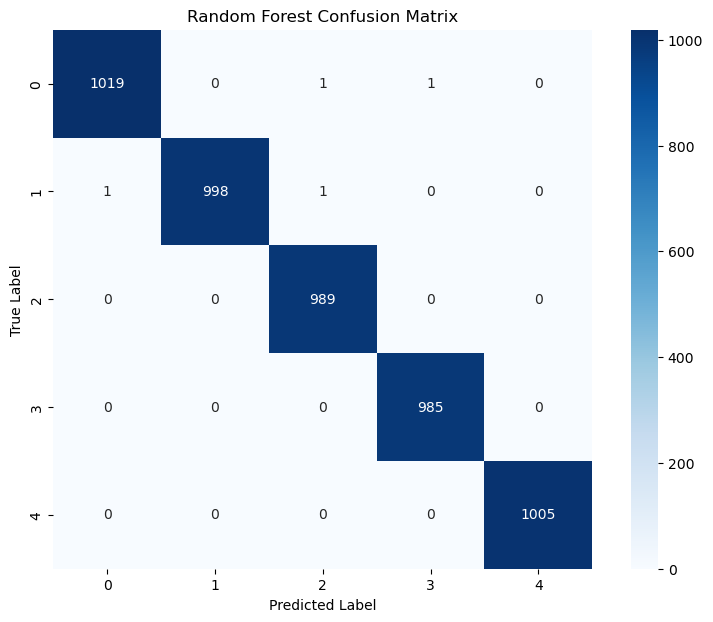

In [38]:
# Confusion Matrix for Random Forest
plot_confusion_matrix(y_test, rf_predictions, title='Random Forest Confusion Matrix')

In [42]:
# Best parameters for Decision Tree
print("Best parameters for Decision Tree:")
print(dt_grid_search.best_params_)

Best parameters for Decision Tree:
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [46]:
# Evaluate on test data
best_dt_model = dt_grid_search.best_estimator_
dt_predictions = best_dt_model.predict(x_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))

Decision Tree Accuracy: 0.9948


In [47]:
# Classification Report for Decision Tree
print("Classification Report for Decision Tree:")
print(classification_report(y_test, dt_predictions))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1021
           1       1.00      1.00      1.00      1000
           2       0.99      1.00      1.00       989
           3       0.99      0.99      0.99       985
           4       1.00      1.00      1.00      1005

    accuracy                           0.99      5000
   macro avg       0.99      0.99      0.99      5000
weighted avg       0.99      0.99      0.99      5000



In [49]:
# Confusion Matrix for Decision Tree
plot_confusion_matrix(y_test, dt_predictions, title='Decision Tree Confusion Matrix')

NameError: name 'plot_confusion_matrix' is not defined

In [50]:
# Get classification reports
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
dt_report = classification_report(y_test, dt_predictions, output_dict=True)

In [42]:
# Create a comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': ['Random Forest', 'Decision Tree'],
    'Accuracy': [accuracy_score(y_test, rf_predictions), accuracy_score(y_test, dt_predictions)],
    'Precision': [rf_report['weighted avg']['precision'], dt_report['weighted avg']['precision']],
    'Recall': [rf_report['weighted avg']['recall'], dt_report['weighted avg']['recall']],
    'F1 Score': [rf_report['weighted avg']['f1-score'], dt_report['weighted avg']['f1-score']]
})

In [43]:
print(comparison_df)

           Model  Accuracy  Precision  Recall  F1 Score
0  Random Forest    0.9978   0.997803  0.9978  0.997800
1  Decision Tree    0.9936   0.993598  0.9936  0.993593


In [44]:
# Set the bar width
bar_width = 0.15
index = np.arange(len(comparison_df))

<BarContainer object of 2 artists>

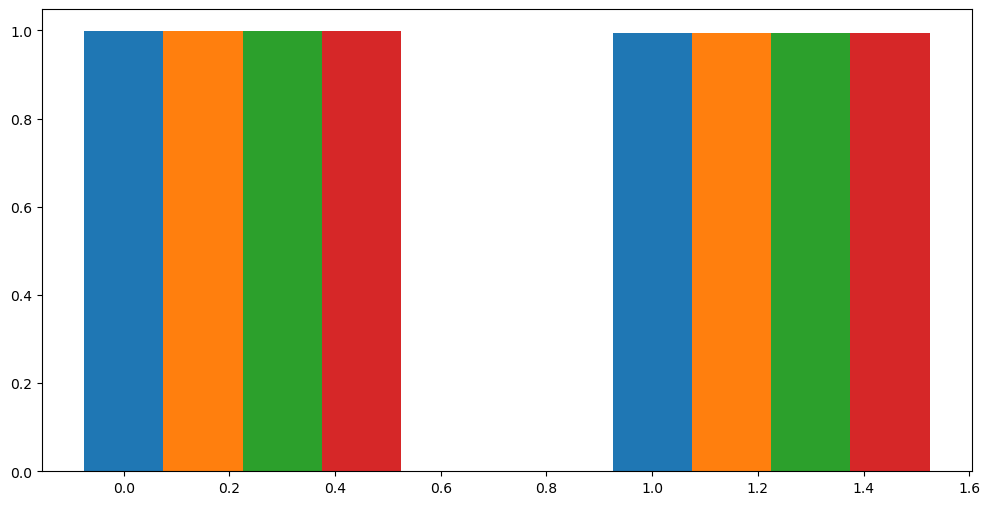

In [45]:
# Create bar plots for each metric
plt.figure(figsize=(12, 6))
plt.bar(index, comparison_df['Accuracy'], bar_width, label='Accuracy')
plt.bar(index + bar_width, comparison_df['Precision'], bar_width, label='Precision')
plt.bar(index + 2 * bar_width, comparison_df['Recall'], bar_width, label='Recall')
plt.bar(index + 3 * bar_width, comparison_df['F1 Score'], bar_width, label='F1 Score')

In [46]:
# Number of samples to generate
num_samples = 10

# Generate random noise
noise = np.random.normal(0, 1, (num_samples, noise_dimension))

# Generate synthetic samples using the GAN's generator
generated_samples = results['generator'].predict(noise)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


In [47]:
# Make predictions with the Random Forest model
rf_predictions_generated = best_rf_model.predict(generated_samples)

# Make predictions with the Decision Tree model
dt_predictions_generated = best_dt_model.predict(generated_samples)

In [48]:
# Create a DataFrame for better visualization
predictions_df = pd.DataFrame(generated_samples, columns=[f'Feature {i}' for i in range(generated_samples.shape[1])])
predictions_df['Random Forest Prediction'] = rf_predictions_generated
predictions_df['Decision Tree Prediction'] = dt_predictions_generated

In [49]:
print(predictions_df)

   Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0  -0.999919   0.999965   0.999804  -0.999969  -0.999992  -0.440706   
1  -1.000000   1.000000   0.999999  -1.000000  -1.000000  -0.315538   
2  -0.999990   0.999985   0.999882  -0.999989  -0.999999  -0.458807   
3  -0.999989   0.999992   0.999972  -0.999997  -1.000000  -0.318439   
4  -1.000000   1.000000   1.000000  -1.000000  -1.000000  -0.517548   
5  -0.999979   0.999980   0.999942  -0.999989  -0.999997  -0.422491   
6  -0.999983   0.999993   0.999979  -0.999999  -1.000000  -0.453082   
7  -0.999984   0.999985   0.999944  -0.999993  -0.999999  -0.432720   
8  -0.999874   0.999889   0.999712  -0.999907  -0.999984  -0.365853   
9  -1.000000   1.000000   0.999999  -1.000000  -1.000000  -0.690582   

   Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 30  Feature 31  \
0  -0.999999  -0.999991  -0.999786  -0.999942  ...   -0.998392   -0.999958   
1  -1.000000  -1.000000  -0.999998  -1.000000  ...   -0.999979

In [50]:
# Save the generator and discriminator
results['generator'].save('gan_generator1.h5')
results['discriminator'].save('gan_discriminator1.h5')

# Optionally, save the full GAN model
results['gan'].save('gan_model1.h5')

In [51]:
import joblib

In [52]:
# Save the Random Forest model
joblib.dump(best_rf_model, 'random_forest_model1.pkl')

['random_forest_model1.pkl']

In [53]:
# Save the Decision Tree model
joblib.dump(best_dt_model, 'decision_tree_model1.pkl')

['decision_tree_model1.pkl']

In [54]:
# Number of samples to generate
num_samples = 100

# Generate random noise
noise = np.random.normal(0, 1, (num_samples, noise_dimension))

# Generate synthetic samples using the GAN's generator
generated_samples = results['generator'].predict(noise)

# Make predictions with the Random Forest model
rf_predictions_generated = best_rf_model.predict(generated_samples)

# Make predictions with the Decision Tree model
dt_predictions_generated = best_dt_model.predict(generated_samples)

# Create a DataFrame for better visualization
predictions_df = pd.DataFrame(generated_samples, columns=[f'Feature {i}' for i in range(generated_samples.shape[1])])
predictions_df['Random Forest Prediction'] = rf_predictions_generated
predictions_df['Decision Tree Prediction'] = dt_predictions_generated

print(predictions_df)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
    Feature 0  Feature 1  Feature 2  Feature 3  Feature 4  Feature 5  \
0   -0.999993   0.999991   0.999985  -0.999999  -0.999999  -0.410111   
1   -0.999985   0.999992   0.999938  -0.999990  -0.999999  -0.384285   
2   -0.999991   0.999988   0.999976  -0.999996  -0.999999  -0.464184   
3   -0.999996   0.999970   0.999978  -0.999998  -1.000000  -0.369692   
4   -0.999999   0.999996   0.999997  -1.000000  -1.000000  -0.454682   
..        ...        ...        ...        ...        ...        ...   
95  -0.999999   1.000000   0.999999  -1.000000  -1.000000  -0.465090   
96  -0.999995   0.999993   0.999971  -0.999996  -1.000000  -0.403403   
97  -0.999987   0.999983   0.999973  -0.999999  -0.999999  -0.377586   
98  -0.999998   0.999999   0.999989  -1.000000  -1.000000  -0.500196   
99  -0.999998   0.999998   0.999995  -1.000000  -1.000000  -0.317956   

    Feature 6  Feature 7  Feature 8  Feature 9  ...  Feature 30  Feature 31  \
0        -1.0  -0.

In [55]:
def plot_generated_samples(generator, noise_dim, num_samples=25):
    noise = np.random.normal(0, 1, (num_samples, noise_dim))
    generated_samples = generator.predict(noise)
    
    # If generated_samples is 1D or 2D, we can visualize them directly.
    plt.figure(figsize=(10, 10))
    for i in range(num_samples):
        plt.subplot(5, 5, i + 1)
        plt.bar(range(len(generated_samples[i])), generated_samples[i])  # Example for 1D data
        #plt.axis('off')
    plt.tight_layout()
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


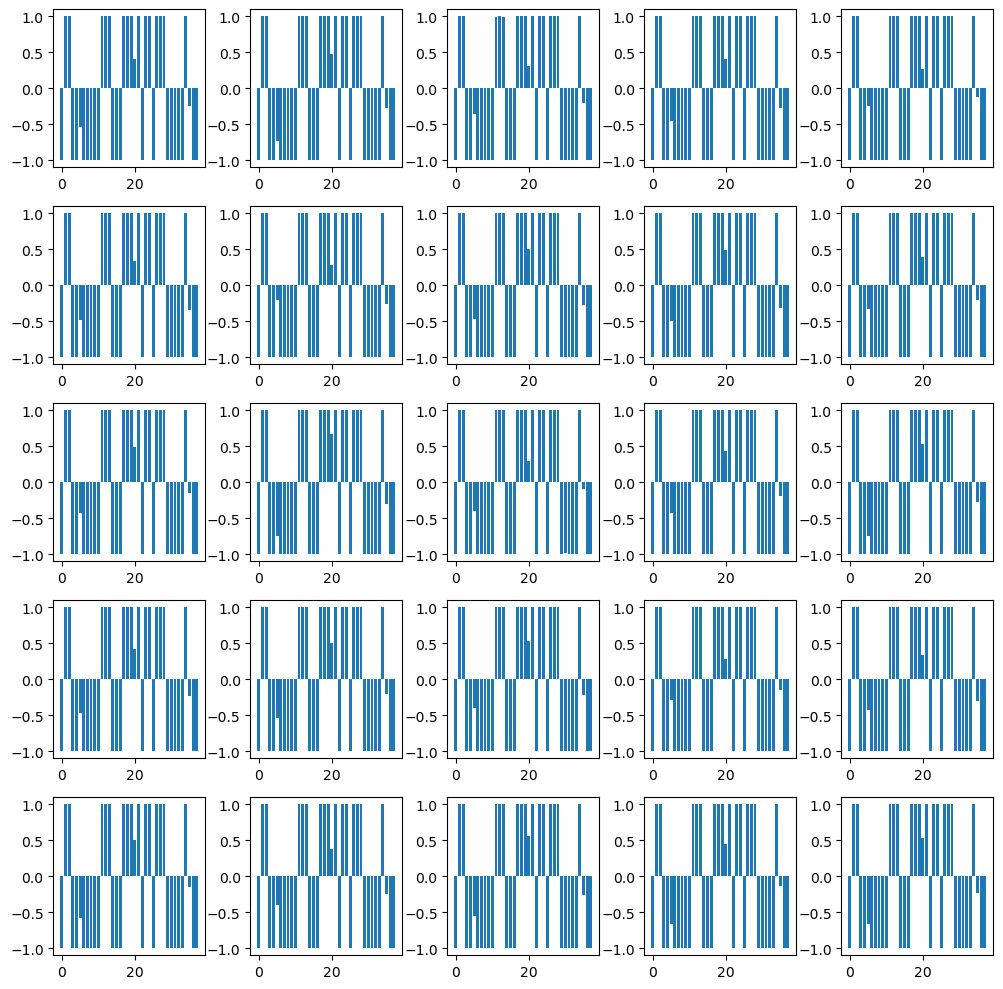

In [56]:
plot_generated_samples(results['generator'], noise_dimension)